In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('laptop_pricing_dataset.csv')

In [3]:
df.sample(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
28,28,HP,4,IPS Panel,3,1,7,33.020,2.7,8,256,1.38,1421
205,205,Dell,3,Full HD,2,1,5,39.624,2.5,8,128,1.90,1200
102,102,Lenovo,3,IPS Panel,1,1,7,38.100,1.8,8,256,2.10,1562
157,157,Lenovo,3,Full HD,2,1,5,39.624,1.6,4,256,1.80,1053
29,29,HP,3,IPS Panel,3,1,5,35.560,2.5,6,256,NaN,837


In [4]:
df.shape

(238, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [39]:
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

<Axes: xlabel='Screen_Size_cm', ylabel='Count'>

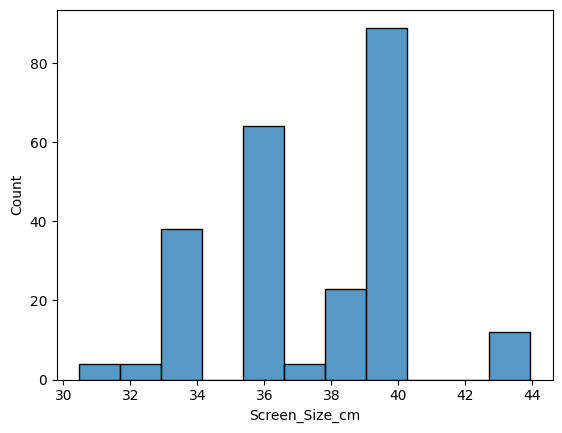

In [37]:
sns.histplot(df['Screen_Size_cm'])


In [34]:
df['Screen_Size_cm'].fillna(df['Screen_Size_cm'].mean(),inplace=True)

<Axes: xlabel='Weight_kg', ylabel='Count'>

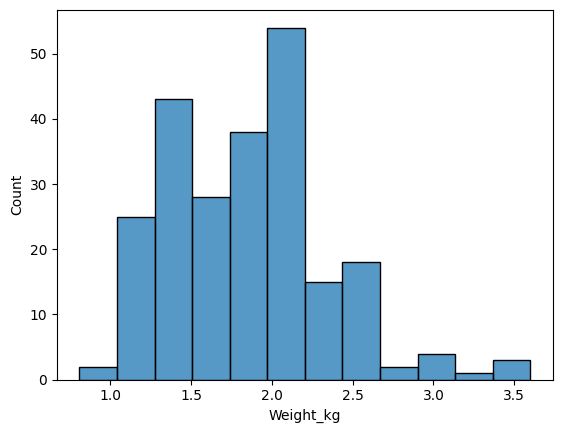

In [36]:
sns.histplot(df['Weight_kg'])

In [38]:
df['Weight_kg'].fillna(df['Weight_kg'].mean(),inplace=True)

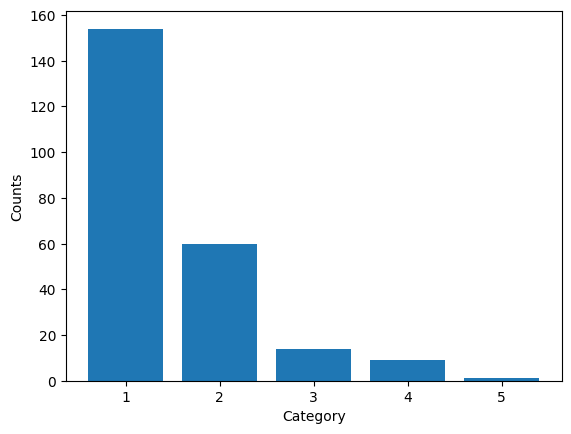

3    154
4     60
1     14
5      9
2      1
Name: Category, dtype: int64


In [22]:
# The category to which the laptop belongs: Gaming - 1
# Netbook - 2
# Notebook - 3
# Ultrabook - 4
# Workstation - 5
plt.bar(np.arange(1,6),df['Category'].value_counts())
plt.xlabel('Category')
plt.ylabel('Counts')
plt.show()
print(df['Category'].value_counts())

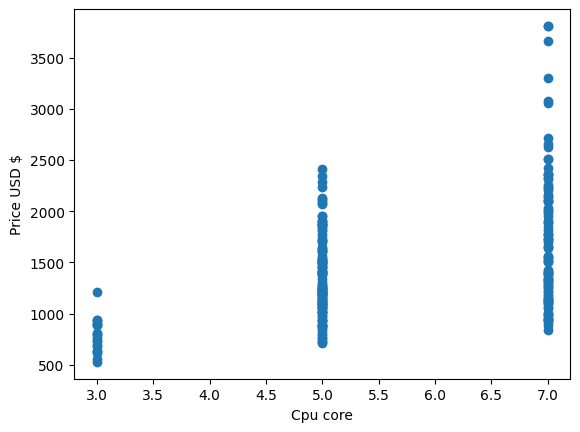

In [21]:
plt.scatter(df['CPU_core'],df['Price'])
plt.xlabel('Cpu core')
plt.ylabel('Price USD $')
plt.show()

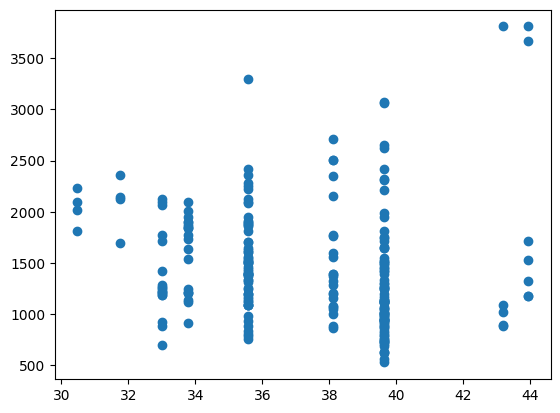

In [28]:
plt.scatter(df['Screen_Size_cm'],df['Price'])
plt.show()

In [40]:
df.sample(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
11,11,HP,3,Full HD,2,1,3,39.624,2.0,4,128,1.91,558
22,22,Dell,4,IPS Panel,2,1,7,33.020,1.8,8,256,1.21,2095
179,179,Lenovo,3,IPS Panel,2,1,5,33.020,2.5,8,256,1.44,1219
154,154,Dell,3,Full HD,1,2,5,39.624,2.5,4,128,2.18,723
115,115,Dell,3,Full HD,3,1,5,35.560,2.8,8,256,1.64,1498


In [42]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [44]:
df['Manufacturer'].unique()

array(['Acer', 'Dell', 'HP', 'Asus', 'Lenovo', 'Huawei', 'Toshiba', 'MSI',
       'Razer', 'Samsung', 'Xiaomi'], dtype=object)

In [45]:
df['Manufacturer'].replace(['Acer', 'Dell', 'HP', 'Asus', 'Lenovo', 'Huawei', 'Toshiba', 'MSI',
       'Razer', 'Samsung', 'Xiaomi'],[1,2,3,4,5,6,7,8,9,10,11],inplace=True)

In [47]:
df['Screen'].unique()

array(['IPS Panel', 'Full HD'], dtype=object)

In [48]:
df['Screen'].replace(['IPS Panel', 'Full HD'],[1,2],inplace=True)

In [49]:
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,1,4,1,2,1,5,35.560,1.6,8,256,1.60,978
1,2,3,2,1,1,3,39.624,2.0,4,256,2.20,634
2,2,3,2,1,1,7,39.624,2.7,8,256,2.20,946
3,2,4,1,2,1,5,33.782,1.6,8,128,1.22,1244
4,3,4,2,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,5,4,1,2,1,7,35.560,2.6,8,256,1.70,1891
234,7,3,2,2,1,5,33.782,2.4,8,256,1.20,1950
235,5,4,1,2,1,5,30.480,2.6,8,256,1.36,2236
236,5,3,2,3,1,5,39.624,2.5,6,256,2.40,883


In [55]:
df.corr()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
Manufacturer,1.000000,-0.115031,-0.133595,0.125010,-0.182886,0.048900,-0.207465,0.219162,0.115800,0.024302,-0.252954,0.221061
Category,-0.115031,1.000000,-0.117608,-0.114174,-0.043378,0.232425,-0.305035,-0.053414,0.030127,0.038246,-0.381032,0.286243
Screen,-0.133595,-0.117608,1.000000,-0.089582,0.172891,0.003837,0.335416,0.055273,0.017913,0.061402,0.117909,-0.021075
GPU,0.125010,-0.114174,-0.089582,1.000000,-0.199549,0.145388,0.152979,0.291439,0.218973,0.094288,0.262853,0.288298
OS,-0.182886,-0.043378,0.172891,-0.199549,1.000000,0.016954,0.150835,0.050407,-0.074625,0.007751,0.120858,-0.221730
CPU_core,0.048900,0.232425,0.003837,0.145388,0.016954,1.000000,0.037293,0.242722,0.473075,0.400015,0.068599,0.459398
Screen_Size_cm,-0.207465,-0.305035,0.335416,0.152979,0.150835,0.037293,1.000000,-0.002262,0.017651,0.116368,0.810703,-0.126672
CPU_frequency,0.219162,-0.053414,0.055273,0.291439,0.050407,0.242722,-0.002262,1.000000,0.226736,0.035557,0.066522,0.366666
RAM_GB,0.115800,0.030127,0.017913,0.218973,-0.074625,0.473075,0.017651,0.226736,1.000000,0.361469,0.055068,0.549297
Storage_GB_SSD,0.024302,0.038246,0.061402,0.094288,0.007751,0.400015,0.116368,0.035557,0.361469,1.000000,0.112519,0.243421


In [51]:
X=df.drop(columns=['Price'])
y=df['Price']

In [53]:
X.shape

(238, 11)

In [54]:
y.shape

(238,)

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
sgd=SGDRegressor()
sgd.fit(X_train,y_train)

SGDRegressor()

In [65]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [60]:
y_pred_lr=lr.predict(X_test)
y_pred_sgd=sgd.predict(X_test)

In [61]:
print('Mean Squared error in Linear Regression:',mean_squared_error(y_pred_lr,y_test))
print('Mean Squared error in SGD:',mean_squared_error(y_pred_sgd,y_test))

Mean Squared error in Linear Regression: 153808.24203806432
Mean Squared error in SGD: 3.5607532774703195e+26


In [63]:
print('R2 score in Linear Regression:',r2_score(y_pred_lr,y_test))
print('R2 score in SGD:',r2_score(y_pred_sgd,y_test))

R2 score in Linear Regression: 0.43716398265990486
R2 score in SGD: -6.432126212210426


In [66]:
print('Mean absolute error in Linear Regression:',mean_absolute_error(y_pred_lr,y_test))
print('Mean absolute error in SGD:',mean_absolute_error(y_pred_sgd,y_test))

Mean absolute error in Linear Regression: 305.19833453166575
Mean absolute error in SGD: 17736939848255.74


In [67]:
print(lr.intercept_,sgd.intercept_)

-825.3737713919452 [-1.05998965e+10]


In [68]:
print(lr.coef_,sgd.coef_)

[ 3.95586453e+01  2.35039515e+02  1.11594316e+02  1.39972648e+02
 -3.16738140e+02  6.32283365e+01 -2.08328349e+01  2.90754138e+02
  9.80334349e+01  2.57702299e-01  9.12536177e+01] [ 1.77305674e+11  5.76145023e+10 -1.39562179e+10 -1.61930091e+10
 -1.56650033e+10 -1.06133060e+11 -5.63512216e+11  2.67228712e+09
 -9.67882972e+10  1.63319145e+11 -4.92161929e+10]


<Axes: >

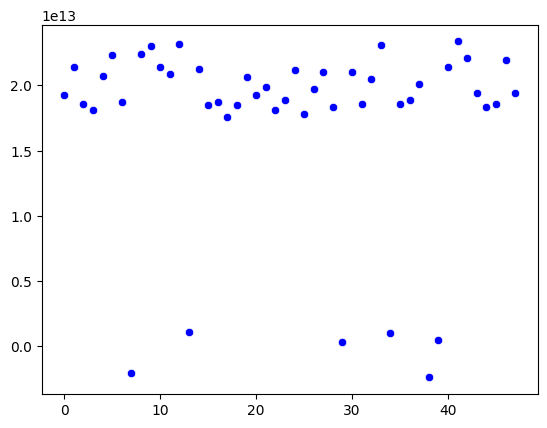

In [79]:
sns.scatterplot(y_pred_sgd,color='b')


<Axes: ylabel='Price'>

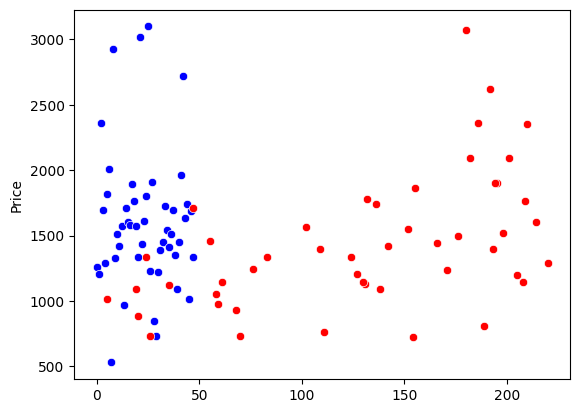

In [77]:
sns.scatterplot(y_pred_lr,color='b')
sns.scatterplot(y_test,color='r')

In [80]:
import pickle

In [83]:

pickle.dump(lr,open('lr.sav','wb'))

In [84]:

pickle.dump(sgd,open('sgd.sav','wb'))